## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_dataset= pd.merge(study_results,mouse_metadata, on="Mouse ID", how ="left")

In [12]:
# Checking the number of mice in the DataFrame.
total_mouse=single_dataset["Mouse ID"].count()
print(f"There are {total_mouse} mices in the DataFrame")


There are 1893 mices in the DataFrame


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset=single_dataset.drop_duplicates(subset=["Mouse ID"],keep="last")
clean_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
20,x336,0,45.000000,0,Naftisol,Female,4,29
53,h428,0,45.000000,0,Ketapril,Female,1,27
55,v199,0,45.000000,0,Naftisol,Female,17,29
109,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Checking the number of mice in the clean DataFrame.
tot_mouse_clean=clean_dataset["Mouse ID"].count()

print(f"There are {tot_mouse_clean} mices in the clean DataFrame")


There are 249 mices in the clean DataFrame


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stand_dev= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics_df=pd.DataFrame({"Mean": mean,"Median":median,"Variance":variance,"Standard Deviation":stand_dev,"SEM":sem})


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

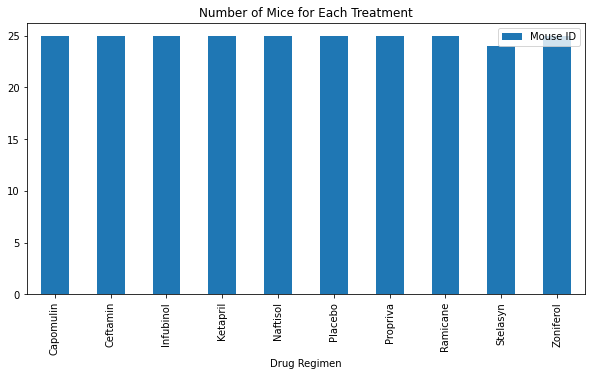

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
Drug_regimen_df=pd.DataFrame(clean_dataset.groupby(["Drug Regimen"]).count())
y_plot=Drug_regimen_df[["Mouse ID"]]
y_plot.plot(kind="bar",figsize= (10,5))
plt.title("Number of Mice for Each Treatment")
plt.show()



In [24]:
Drug_regimen_df=Drug_regimen_df.reset_index()

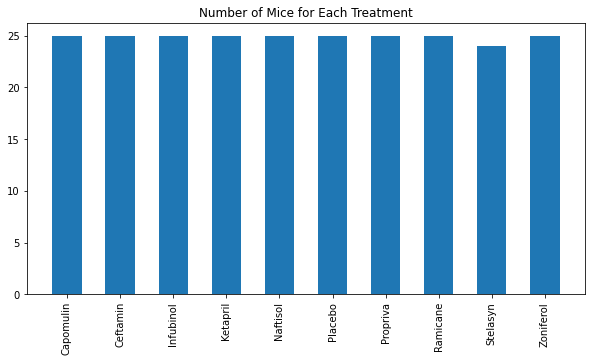

In [28]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(Drug_regimen_df))

yaxis=Drug_regimen_df["Drug Regimen"].tolist()
regimen_count=(clean_dataset.groupby(["Drug Regimen"])["Age_months"].count())
plt.figure(figsize=(10,5))
plt.bar(x_axis,regimen_count, width=.55)
plt.xticks(x_axis,yaxis, rotation="vertical" )
plt.title("Number of Mice for Each Treatment")
plt.show()

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
